# **Bank Churn Prediction**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data='data/Bank_Churn.csv'
random=42

In [ ]:
df=pd.read_csv(data)

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop('CustomerId',axis=1,inplace=True)

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

<Axes: xlabel='Age', ylabel='Count'>

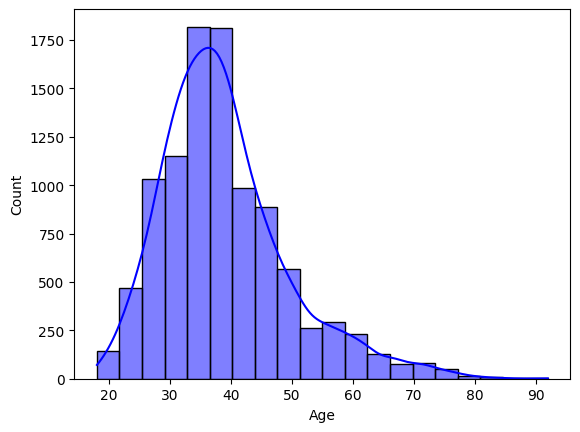

In [ ]:
sns.histplot(df['Age'],kde=True,color='blue',bins=20)

In [ ]:
df.select_dtypes(include=np.number).skew().sort_values(ascending=False)

,0
Exited,1.471611
Age,1.011320
NumOfProducts,0.745568
Tenure,0.010991
EstimatedSalary,0.002085
IsActiveMember,-0.060437
CreditScore,-0.071607
Balance,-0.141109
HasCrCard,-0.901812


In [ ]:
df['LogAge'] = np.log1p(df['Age'])

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.761200
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.737670
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3.761200
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.688879
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3.688879
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3.583519
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3.610918
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3.761200


<Axes: xlabel='LogAge', ylabel='Count'>

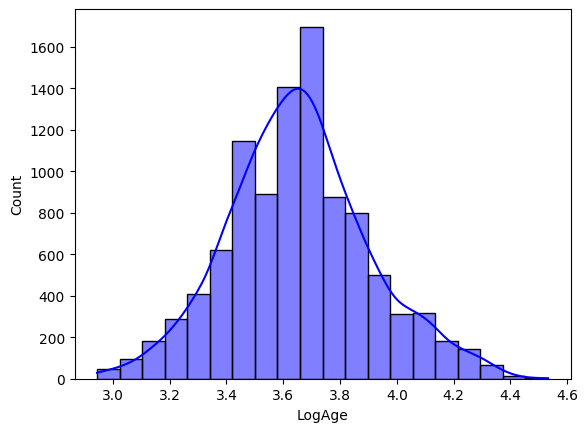

In [ ]:
sns.histplot(df['LogAge'],kde=True,color='blue',bins=20)

<Axes: xlabel='Age'>

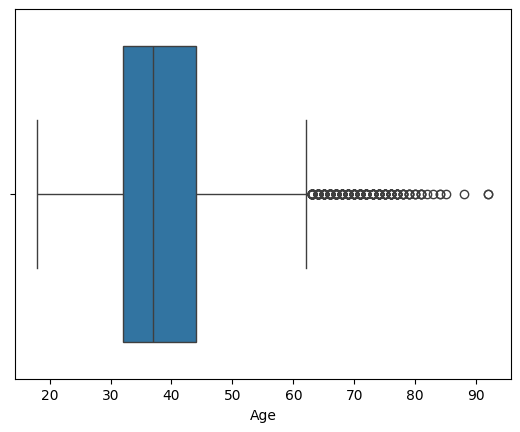

In [ ]:
sns.boxplot(data=df,x=df['Age'])

<Axes: xlabel='Tenure', ylabel='count'>

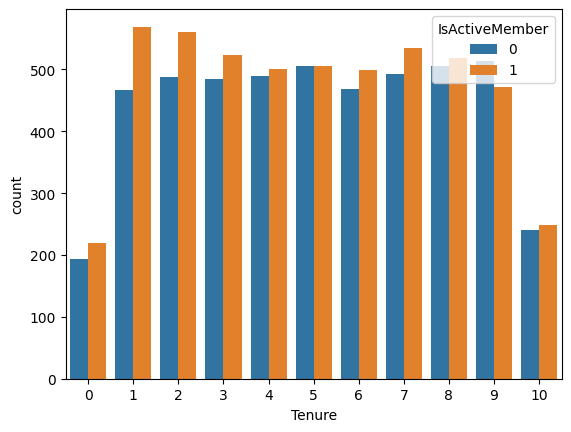

In [ ]:
sns.countplot(x='Tenure',data=df,hue='IsActiveMember')

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'LogAge'],
      dtype='object')

In [ ]:
corr_matrix = df[['CreditScore','LogAge', 'Tenure','Balance','EstimatedSalary']].corr()

In [ ]:
corr_matrix

,CreditScore,LogAge,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.006456,0.000842,0.006268,-0.001384
LogAge,-0.006456,1.000000,-0.011173,0.030590,-0.006276
Tenure,0.000842,-0.011173,1.000000,-0.012254,0.007784
Balance,0.006268,0.030590,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.006276,0.007784,0.012797,1.000000


In [ ]:
cross_tab = pd.crosstab(index=['CreditScore','LogAge', 'Tenure','Exited','Balance','EstimatedSalary'],columns=['CreditScore','LogAge', 'Tenure','Exited','Balance','EstimatedSalary'])

In [ ]:
ct = pd.crosstab(index=df['IsActiveMember'],columns=df['Tenure'])
ct

Tenure,0,1,2,3,4,5,6,7,8,9,10
IsActiveMember,,,,,,,,,,,
0,194,466,488,485,489,506,468,493,506,513,241
1,219,569,560,524,500,506,499,535,519,471,249


In [ ]:
cross_tab = df.select_dtypes(include=['int','float']).corr()
cross_tab

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.006456
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.983553
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.011173
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.030590
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.030077
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.011685
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.065389
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.006276
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.294225
LogAge,-0.006456,0.983553,-0.011173,0.030590,-0.030077,-0.011685,0.065389,-0.006276,0.294225,1.000000


<Axes: >

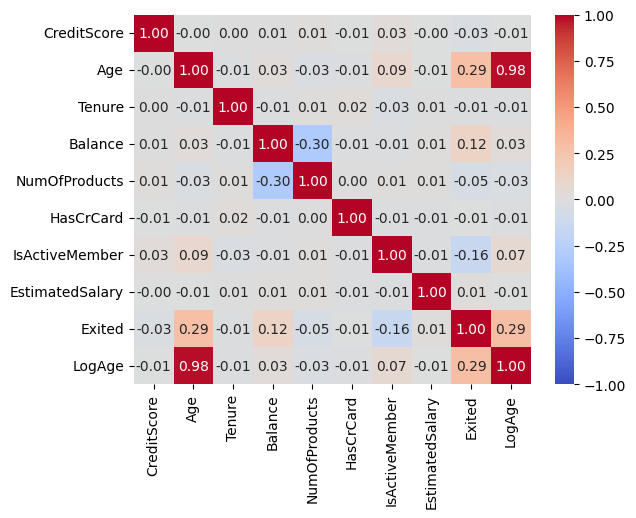

In [ ]:
sns.heatmap(cross_tab,annot=True,cmap='coolwarm',fmt=".2f",vmin=-1,vmax=1)

In [ ]:
sns.countplot()

<Axes: xlabel='Exited', ylabel='count'>

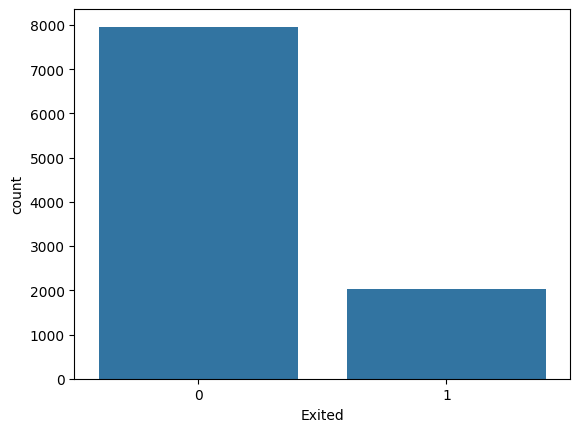

In [ ]:
sns.countplot(df,x='Exited')

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore',drop='first')

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.761200
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.737670
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3.761200
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.688879
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3.688879
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3.583519
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3.610918
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3.761200


In [ ]:
encode = df[['Geography','Gender']]

In [ ]:
x_cat = encoder.fit_transform( df[['Geography','Gender']]).toarray()

In [ ]:
x_cat

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(x_cat,columns=encoder.get_feature_names_out( ['Geography','Gender']))

In [ ]:
encoded_df

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,0.0,0.0,1.0
9997,0.0,0.0,0.0
9998,1.0,0.0,1.0


In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.761200
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.737670
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3.761200
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.688879
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3.688879
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3.583519
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3.610918
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3.761200


In [ ]:
df_encoded = pd.get_dummies(df,columns=['Geography','Gender'],dtype=int)

In [ ]:
df_encoded

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,3.761200,1,0,0,1,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3.737670,0,0,1,1,0
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,3.761200,1,0,0,1,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,3.688879,1,0,0,1,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,3.784190,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,3.688879,1,0,0,0,1
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,3.583519,1,0,0,0,1
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,3.610918,1,0,0,1,0
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,3.761200,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df_encoded.drop(['Exited','Surname'],axis=1)

In [ ]:
y = df_encoded['Exited']
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LogAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,3.496508,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,3.761200,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,3.218876,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,3.332205,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,4.043051,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,4.007333,1,0,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,4.077537,1,0,0,1,0
5390,735,38,1,0.00,3,0,0,92220.12,3.663562,1,0,0,1,0
860,667,43,8,190227.46,1,1,0,97508.04,3.784190,1,0,0,0,1


In [ ]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
x_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LogAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,686,32,6,0.000000,2,1,1,179093.260000,3.496508,1,0,0,0,1
1,632,42,4,119624.600000,2,1,1,195978.860000,3.761200,0,1,0,0,1
2,559,24,3,114739.920000,1,1,0,85891.020000,3.218876,0,0,1,0,1
3,561,27,9,135637.000000,1,1,0,153080.400000,3.332205,1,0,0,1,0
4,517,56,9,142147.320000,1,0,0,39488.040000,4.043051,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12707,747,47,6,133415.111263,1,0,1,3409.082623,3.877124,0,0,0,0,0
12708,730,43,8,0.000000,1,0,0,199220.081437,3.786281,0,0,1,0,0
12709,769,32,2,0.000000,1,1,0,193872.703755,3.519763,0,0,0,0,0
12710,648,56,7,110599.540192,1,0,0,134673.548272,4.049509,0,1,0,0,0


In [ ]:
y_train_smote.value_counts()

,count
Exited,
0,6356
1,6356


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(x_train_smote)
X_test = scaler.transform(x_test)

#Logistic
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train_smote)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1607
           1       0.52      0.43      0.47       393

    accuracy                           0.81      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.80      0.81      0.80      2000



In [ ]:
#SVM
svm_model = SVC(C=0.5,kernel='rbf',gamma='scale',random_state=random)
svm_model.fit(X_train,y_train_smote)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.54      0.59       393

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train_smote)
y_pred = KNN.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1607
           1       0.52      0.49      0.50       393

    accuracy                           0.81      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.81      0.81      0.81      2000



In [ ]:
#RANDOM FOREST
random_model = RandomForestClassifier(n_estimators=100)
random_model.fit(X_train,y_train_smote)
y_pred = random_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.65      0.57      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, random_state=random, learning_rate=0.1)
xgb_model.fit(X_train,y_train_smote)
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.59      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train,y_train_smote)
y_pred = gb_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.65      0.61      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[50,100,150,200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3,5,7]

}

gb_grid = GridSearchCV(gb_model,params,cv=5,scoring='recall',)
gb_grid.fit(X_train,y_train_smote)

print('Best Params:', gb_grid.best_params_)

Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05,)
gb_model.fit(X_train,y_train_smote)
y_pred = gb_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.60      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [ ]:
import joblib

joblib.dump(gb_model,'Churn_Model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
feature_names = x_train_smote.columns.tolist()

In [ ]:
feature_names

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'LogAge',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [ ]:
joblib.dump(feature_names,'feature_names.pkl')

['feature_names.pkl']